# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1


for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    city_url = url + "&q=" + city.replace(" ","+")
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    record_count += 1

    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | mariakani
Processing Record 3 of Set 1 | cadillac
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | mahibadhoo
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | zhigansk
Processing Record 8 of Set 1 | kharan
Processing Record 9 of Set 1 | haines junction
Processing Record 10 of Set 1 | watsa
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | nyurba
Processing Record 13 of Set 1 | garmsar
Processing Record 14 of Set 1 | ossora
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-pierre
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | pemangkat
Processing Record 22 of Set 1 | sarangani
Processing Record 23 of Set 1 | georgetown
Pr

Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | porto novo
Processing Record 41 of Set 4 | tura
Processing Record 42 of Set 4 | buchanan
Processing Record 43 of Set 4 | qui nhon
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | tautira
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | rocha
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 50 of Set 4 | tawnat
City not found. Skipping...
Processing Record 1 of Set 5 | bredasdorp
Processing Record 2 of Set 5 | benxi
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | port hardy
Processing Record 5 of Set 5 | myitkyina
Processing Record 6 of Set 5 | san joaquin
Processing Record 7 of Set 5 | henties bay
Processing Record 8 of Set 5 | saint anthony
Processing Record 9 of Set 5 | awbari
Processing Record 10 of Set 5 | quezon
Processing Record 11 of Set 5 | huejucar
Processing

Processing Record 26 of Set 8 | khavarion
City not found. Skipping...
Processing Record 27 of Set 8 | kulhudhuffushi
Processing Record 28 of Set 8 | lavrentiya
Processing Record 29 of Set 8 | sovetskiy
Processing Record 30 of Set 8 | rafaela
Processing Record 31 of Set 8 | cascais
Processing Record 32 of Set 8 | havelock
Processing Record 33 of Set 8 | shipunovo
Processing Record 34 of Set 8 | ostrovnoy
Processing Record 35 of Set 8 | la ronge
Processing Record 36 of Set 8 | barcelos
Processing Record 37 of Set 8 | varena
Processing Record 38 of Set 8 | amga
Processing Record 39 of Set 8 | maniitsoq
Processing Record 40 of Set 8 | washougal
Processing Record 41 of Set 8 | tsarychanka
Processing Record 42 of Set 8 | svetlyy
Processing Record 43 of Set 8 | port-gentil
Processing Record 44 of Set 8 | kosonsoy
Processing Record 45 of Set 8 | aporawan
City not found. Skipping...
Processing Record 46 of Set 8 | batemans bay
Processing Record 47 of Set 8 | manzhouli
Processing Record 48 of Se

Processing Record 14 of Set 12 | kahului
Processing Record 15 of Set 12 | lapithos
Processing Record 16 of Set 12 | hammerfest
Processing Record 17 of Set 12 | naduvattam
Processing Record 18 of Set 12 | channarayapatna
Processing Record 19 of Set 12 | kampot
Processing Record 20 of Set 12 | samarinda
Processing Record 21 of Set 12 | bagotville
Processing Record 22 of Set 12 | wanning
Processing Record 23 of Set 12 | san quintin
Processing Record 24 of Set 12 | jugsalai
Processing Record 25 of Set 12 | elko
Processing Record 26 of Set 12 | maceio
Processing Record 27 of Set 12 | hede
Processing Record 28 of Set 12 | bijar
Processing Record 29 of Set 12 | valenca
Processing Record 30 of Set 12 | bilibino
Processing Record 31 of Set 12 | shelburne
Processing Record 32 of Set 12 | brufut
Processing Record 33 of Set 12 | peleduy
Processing Record 34 of Set 12 | palm coast
Processing Record 35 of Set 12 | prince rupert
Processing Record 36 of Set 12 | villarrica
Processing Record 37 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df = pd.DataFrame(city_data)

In [5]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lorengau,-2.0226,147.2712,86.79,60,96,5.48,PG,1666750088
1,mariakani,-3.8633,39.4736,71.65,94,72,3.71,KE,1666750089
2,cadillac,44.2519,-85.4012,55.31,94,100,0.00,US,1666750089
3,rikitea,-23.1203,-134.9692,72.88,79,47,13.62,PF,1666750009
4,mahibadhoo,3.7833,72.9667,81.86,77,67,9.95,MV,1666750089
...,...,...,...,...,...,...,...,...,...
569,jardim,-21.4803,-56.1381,72.01,51,0,4.68,BR,1666750990
570,shache,38.4167,77.2406,54.72,26,96,2.33,CN,1666750906
571,doha,25.2867,51.5333,80.58,67,0,1.14,QA,1666750990
572,coihaique,-45.5752,-72.0662,48.15,87,0,6.91,CL,1666750990


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.328864,18.550943,58.653467,74.243902,58.388502,7.570348,1.666750e+09
std,33.221222,93.184688,20.675251,19.768726,40.514543,5.336061,2.857624e+02
min,-54.800000,-179.166700,-7.280000,1.000000,0.000000,0.000000,1.666750e+09
25%,-5.088200,-65.400450,46.795000,64.000000,15.500000,3.875000,1.666750e+09
50%,25.593250,22.872750,62.510000,79.000000,73.000000,6.600000,1.666750e+09
75%,49.487475,104.861600,75.225000,90.000000,100.000000,10.030000,1.666751e+09
max,78.218600,179.316700,98.580000,100.000000,100.000000,33.600000,1.666751e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_df[(city_data_df["Humidity"] > 100)].index
                                  
dirty_city_data


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(dirty_city_data, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lorengau,-2.0226,147.2712,86.79,60,96,5.48,PG,1666750088
1,mariakani,-3.8633,39.4736,71.65,94,72,3.71,KE,1666750089
2,cadillac,44.2519,-85.4012,55.31,94,100,0.00,US,1666750089
3,rikitea,-23.1203,-134.9692,72.88,79,47,13.62,PF,1666750009
4,mahibadhoo,3.7833,72.9667,81.86,77,67,9.95,MV,1666750089


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\thill\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


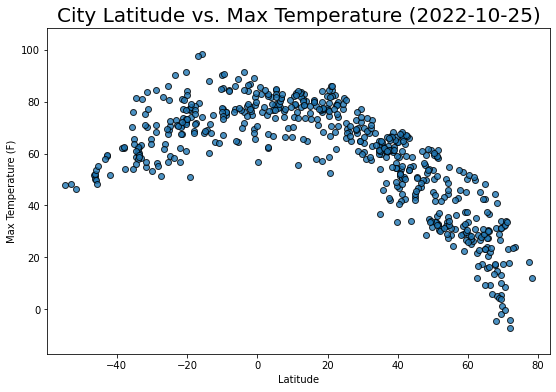

In [9]:
plt.figure(figsize=(9,6))

plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=10, color='black')
plt.xlabel('Latitude', fontsize=10, color='black')


plt.ylim(min(clean_city_data['Max Temp'])-10, max(clean_city_data['Max Temp'])+10)


plt.xlim(min(clean_city_data['Lat'])-5, max(clean_city_data['Lat'])+5)

plt.savefig('output_data/City Latitude vs. MaxTemp.png')


plt.show()

## Latitude vs. Humidity Plot

C:\Users\thill\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


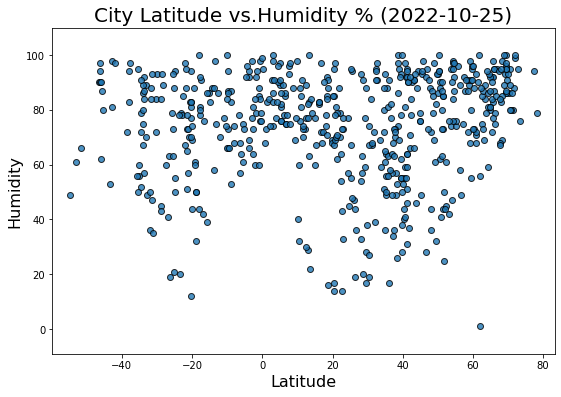

In [11]:
plt.figure(figsize=(9,6))


plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title('City Latitude vs.Humidity % ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')


plt.ylim(min(clean_city_data['Humidity'])-10, max(clean_city_data['Humidity'])+10)


plt.xlim(min(clean_city_data['Lat'])-5, max(clean_city_data['Lat'])+5)

plt.savefig('output_data/City Latitude vs. Humidity.png')


plt.show()

## Latitude vs. Cloudiness Plot

C:\Users\thill\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


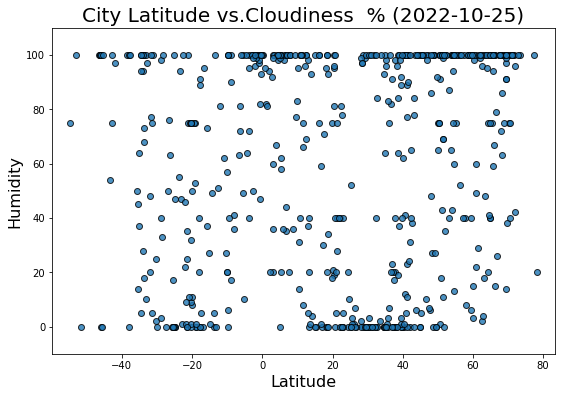

In [12]:
plt.figure(figsize=(9,6))

plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title('City Latitude vs.Cloudiness  % ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')


plt.ylim(min(clean_city_data['Cloudiness'])-10, max(clean_city_data['Cloudiness'])+10)


plt.xlim(min(clean_city_data['Lat'])-5, max(clean_city_data['Lat'])+5)

# plt.savefig('output_data/City Latitude vs. Cloudiness.png')


plt.show()

## Latitude vs. Wind Speed Plot

C:\Users\thill\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


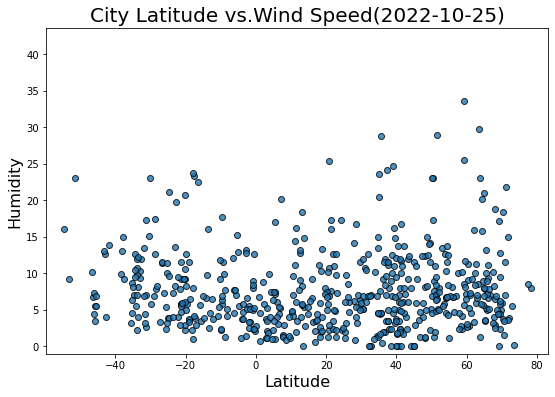

In [14]:
plt.figure(figsize=(9,6))

plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title('City Latitude vs.Wind Speed' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')


plt.ylim(min(clean_city_data['Wind Speed'])-1, max(clean_city_data['Wind Speed'])+10)


plt.xlim(min(clean_city_data['Lat'])-5, max(clean_city_data['Lat'])+5)

plt.savefig('output_data/City Latitude vs. Windspeed.png')


plt.show()

## Linear Regression

In [16]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
clean_city_data_north = clean_city_data[clean_city_data['Lat'] >= 0]
clean_city_data_south = clean_city_data[clean_city_data['Lat'] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7818701244957682


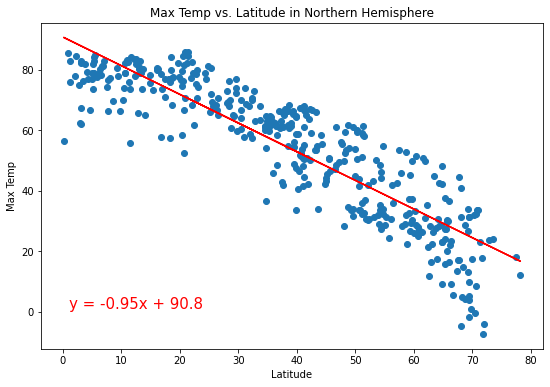

In [17]:
plt.figure(figsize=(9,6))
x_values = clean_city_data_north['Lat']
y_values = clean_city_data_north['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.title('Max Temp vs. Latitude in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")

plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.43630331915854403


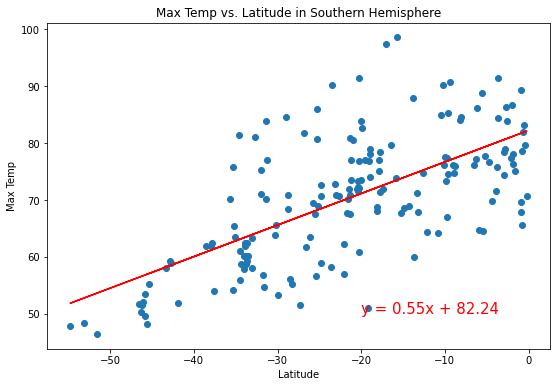

In [18]:
plt.figure(figsize=(9,6))
x_values = clean_city_data_south['Lat']
y_values = clean_city_data_south['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.title('Max Temp vs. Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")

plt.savefig('output_data/City Latitude vs. MaxTemp_South.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.027102663614688875


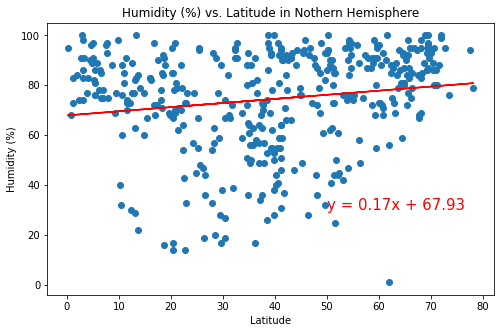

In [19]:
plt.figure(figsize=(8,5))
x_values = clean_city_data_north['Lat']
y_values = clean_city_data_north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.title('Humidity (%) vs. Latitude in Nothern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")

plt.savefig('output_data/City Latitude vs. Humidity_North.png')

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007095282437856019


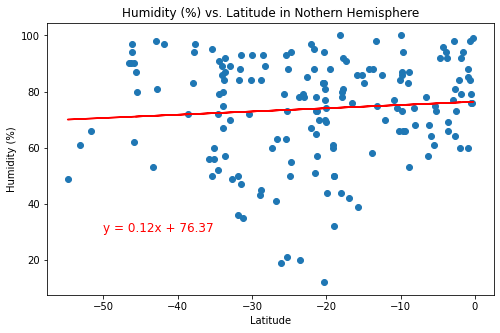

In [20]:
plt.figure(figsize=(8,5))
x_values = clean_city_data_south['Lat']
y_values = clean_city_data_south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")
plt.title('Humidity (%) vs. Latitude in Nothern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")

plt.savefig('output_data/City Latitude vs. Humidity_South.png')

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

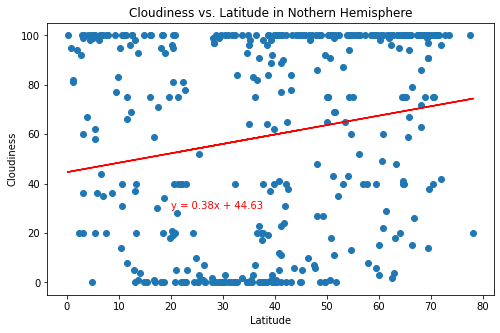

In [21]:
plt.figure(figsize=(8,5))
x_values = clean_city_data_north['Lat']
y_values = clean_city_data_north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=10,color="red")
plt.title('Cloudiness vs. Latitude in Nothern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

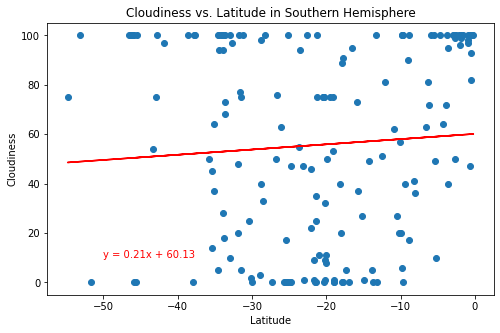

In [22]:
plt.figure(figsize=(8,5))
x_values = clean_city_data_south['Lat']
y_values = clean_city_data_south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=10,color="red")
plt.title('Cloudiness vs. Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/City Latitude vs. Cloudiness_South.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

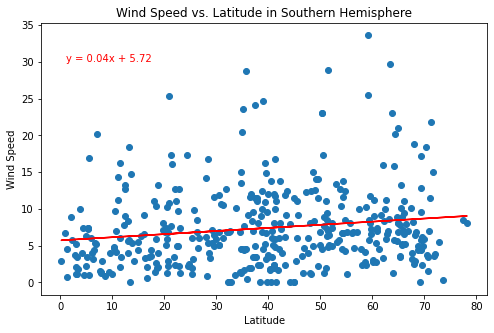

In [25]:
plt.figure(figsize=(8,5))
x_values = clean_city_data_north['Lat']
y_values = clean_city_data_north['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,30),fontsize=10,color="red")
plt.title('Wind Speed vs. Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/City Latitude vs. Windspeed_North.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

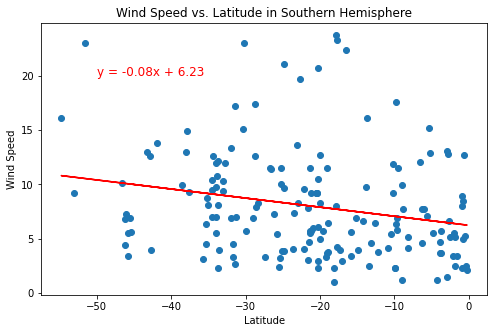

In [24]:
plt.figure(figsize=(8,5))
x_values = clean_city_data_south['Lat']
y_values = clean_city_data_south['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")
plt.title('Wind Speed vs. Latitude in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/City Latitude vs. Windspeed_South.png')
plt.show()